# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [23]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

#functions borrowed from morning warmup last week

def mean(list): #I'm pretty sure sum() and len() don't count a "library" functions, but hey
  sum = 0;
  length = 0;
  for num in list:
    sum += num
    length += 1
  return sum/length

def variance(data): #sample, not population
  xbar = mean(data)
  sumofsquares = 0
  for value in data:
    sumofsquares += (value - xbar)*(value - xbar)
  return sumofsquares / (len(data)-1)

def stdev(data):
  return variance(data)**.5

print(mean(sales))
print(variance(sales))
print(stdev(sales))

3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd

In [12]:
customers = [127, 80, 105, 92, 120, 115, 93]

data = {'customers': customers, 'sales': sales}
df = pd.DataFrame(data)

df.cov() #covariance is 7604.36

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [18]:
#"If we divide our covariance values by the product of the standard deviations 
#of the two variables, we'll end up with what's called the Correlation Coefficient. 
#(Sometimes just referred to as the correlation)." -lecture notebook
correlation = 7604.36/ (stdev(customers)*stdev(sales))

correlation

0.9628343395751515

In [17]:
df.corr() # checks out

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [20]:
#load titanic, check numeric variables
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [21]:
df.cov() #variance-covariance matrix

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [22]:
df.corr() #correlation matrix

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

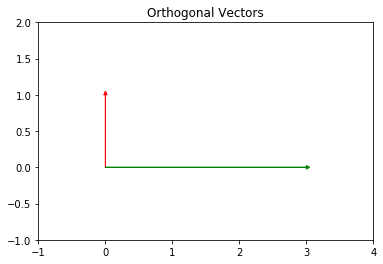

In [25]:
#perpendicular

v1 = [0,1] #unit vector
v2 = [3,0] #scale of unit vector

plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,4)          
plt.ylim(-1,2)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np

In [30]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

print(np.dot(a,b)) #the dot product is not equal to 0, so the vectors are non-orthogonal

print((-5)*6 + 3*(-8) + 7*2) #manual dot product for proof

-40
-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [34]:
c = np.array([2,-15,6,20])

print(np.linalg.norm(c)*np.linalg.norm(c))
print(np.dot(c,c))
print(np.matmul(c.T,c))
#these quantities are all the same
#norm squared is (by pythagorean theorem) sum of each component squared
#dot product with self is sum of each component squared
#transpose turns the row into a column, which doesn't change the result of the dot product

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d =\begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$e =\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} +
-8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [37]:
f = np.array([4,12,11,9,2])

#multiply by inverse of the norm (length) to make length = 1 (unit vector)

f = 1/np.linalg.norm(f) * f
f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

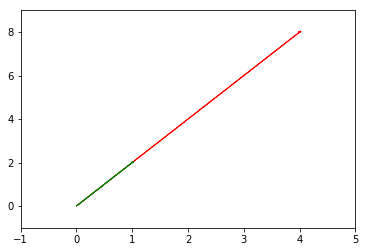

0.0

In [43]:
g = np.array([1,2])
h = np.array([4,8])

plt.arrow(0,0, h[0], h[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, g[0], g[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,9)
plt.show()

np.linalg.det(np.array([[1,2],
                       [4,8]])) #determinant is 0

#g and h are linearly dependent, ℝ

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [46]:
P = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])

np.linalg.det(P) #determinate is non-zero, span will be ℝ3

-19.999999999999996

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



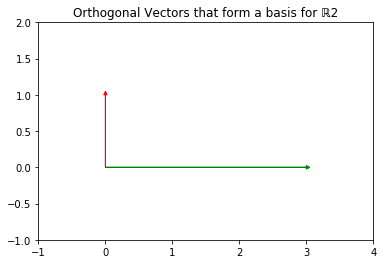

In [44]:
plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,4)          
plt.ylim(-1,2)
plt.title("Orthogonal Vectors that form a basis for ℝ2")
plt.show()

## 6.2 What does it mean to form a basis?

To form a basis of [something] is to span it; vectors that linearly combine to form a set of points/vectors form a basis of that set

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Based on the answer to 5.2, almost certainly 3, but let's check the row-echelon form.

$P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}$

Add row 1 to row 2

$P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}$

Divide row 2 by 2

$P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
4 & 8  & 2
\end{bmatrix}$

Subtract row 1 (x4) from row 3

$P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -10
\end{bmatrix}$

Divide row 3 by -10

$P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}$

Rank 3

## 7.2 What does the rank of a matrix tell us?

The dimension of the vector space spanned by it

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


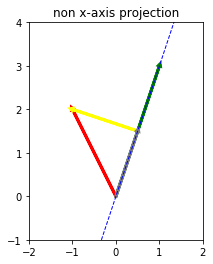

In [52]:
#declared stretch by Ryan

# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-1,4)

# Original Vector
v = [1,3] 
w = [-1,2]

#solve for c
scale = np.dot(w,v) / np.dot(v,v)

proj = np.multiply(scale,v)
x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray') #here's the boy!

plt.title("non x-axis projection")
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

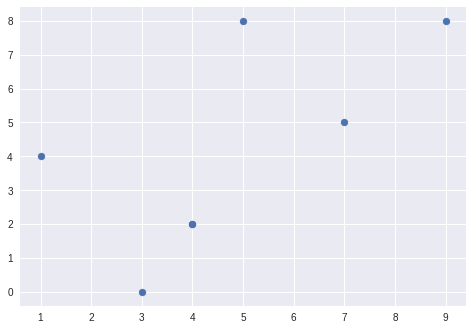

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()